In [1]:
import re
import jovian
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import emoji
import demoji
from collections import Counter

In [2]:
def rawToDf(file, key):
    split_formats = {
        '12hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s[APap][mM]\s-\s',
        '24hr' : '\d{1,2}/\d{1,2}/\d{2,4},\s\d{1,2}:\d{2}\s-\s',
        'custom' : ''
    }
    datetime_formats = {
        '12hr' : '%m/%d/%y, %I:%M %p - ',
        '24hr' : '%m/%d/%y, %H:%M - ',
        'custom': ''
    }
    
    with open('WhatsAppChatwithSeniorsiyyipoyam.txt', 'r', encoding="utf8") as raw_data:
        raw_string = ' '.join(raw_data.read().split('\n')) # converting the list split by newline char. as one whole string as there can be multi-line messages
        user_msg = re.split(split_formats[key], raw_string) [1:] # splits at all the date-time pattern, resulting in list of all the messages with user names
        date_time = re.findall(split_formats[key], raw_string) # finds all the date-time patterns
        
        df = pd.DataFrame({'date_time': date_time, 'user_msg': user_msg}) # exporting it to a df
        
    # converting date-time pattern which is of type String to type datetime,
    # format is to be specified for the whole string where the placeholders are extracted by the method 
    df['date_time'] = pd.to_datetime(df['date_time'], format=datetime_formats[key])
    
    # split user and msg 
    usernames = []
    msgs = []
    for i in df['user_msg']:
        a = re.split('([\w\W]+?):\s', i) # lazy pattern match to first {user_name}: pattern and spliting it aka each msg from a user
        if(a[1:]): # user typed messages
            usernames.append(a[1])
            msgs.append(a[2])
        else: # other notifications in the group(eg: someone was added, some left ...)
            usernames.append("grp_notif")
            msgs.append(a[0])

    # creating new columns         
    df['user'] = usernames
    df['msg'] = msgs

    # dropping the old user_msg col.
    df.drop('user_msg', axis=1, inplace=True)
    
    return df

In [3]:
df = rawToDf('WhatsAppChatwithSeniorsiyyipoyam.txt', '12hr')


In [4]:
df.tail()

,date_time,user,msg
39994,2023-05-29 09:59:00,grp_notif,Your security code with Leela Sai Gitam change...
39995,2023-06-16 13:10:00,grp_notif,Your security code with Leela Sai Gitam change...
39996,2023-06-20 20:04:00,grp_notif,Your security code with ~ PAVAN changed. Tap t...
39997,2023-06-21 12:27:00,grp_notif,Your security code with Leela Sai Gitam change...
39998,2023-06-21 15:03:00,grp_notif,Your security code with Issaku B19-17 changed....


In [5]:
df.shape


(39999, 3)

Data Cleaning


In [6]:
media = df[df['msg']=="<Media omitted> "] #no. of images, images are represented by <media omitted>
media.shape

(8508, 3)

In [7]:
df["user"].unique()

array(['Mohith Medisetty😉', 'Radhakrishna B31', 'Issaku B19-17',
       'grp_notif', 'Gowtham B19', '+91 99630 84797', 'Vivek B12',
       'Ganesh Raju B19', '+91 94911 46169', '+91 99890 40722',
       'Devesh B19', 'Vishal B11', 'Pavan B12', 'RISHIK B31',
       '+91 70751 20218', 'Harish Bokka', '+91 6300 753 171', 'Eswar B11',
       '𝕤𝕚𝕕𝕕hu B12', 'Rohit B11', 'Nazeer Syed B12', 'Purna Chandra',
       '+91 93926 47949', 'Harsha B11', 'Gopichand B33', 'Karthik B19',
       'Vivek B11', 'Tarun B11', '+91 77802 81730', 'Leela Sai Gitam',
       'Sahasra B31', 'Prudhvi B11', '+91 6303 069 013',
       '+91 73860 59767', '+91 83092 39722', 'Avinash B11',
       '+91 70931 14342', '+91 98497 12312', 'Sai Chand B31',
       '+91 6302 872 024', 'Teja Chowdary B18', '+91 79896 12034',
       '+91 77805 83590', 'Chandu Narapinni', 'Hemanth Thumati',
       '+91 6303 651 428', 'Subash', 'Adharsh B11', '+91 70329 42422',
       'Shiva B18', 'Abhiram Gorela B11', '+91 83744 82158',
       'Pra

In [8]:
grp_notif = df[df['user']=="grp_notif"] #no. of grp notifications
grp_notif.shape

(542, 3)

In [9]:
df.drop(media.index, inplace=True) #removing images
df.drop(grp_notif.index, inplace=True)

In [10]:
df.tail()

,date_time,user,msg
39943,2022-12-24 13:34:00,+91 93926 47949,Kindly share this both messages in the class ...
39944,2022-12-24 13:44:00,+91 93926 47949,
39946,2023-01-08 08:07:00,+91 93926 47949,https://youtu.be/krGEHHy9zd8
39964,2023-03-15 17:22:00,+91 93926 47949,*_Greetings from Devtown_* ```We are glad to...
39975,2023-04-23 17:37:00,+91 93926 47949,Basic 7 days long *A to Z Learn Everything abo...


In [11]:
df.reset_index(inplace=True, drop=True)
df.shape

(30949, 3)

Q. Who are the least active and most active persons in the group?


In [12]:
df.groupby("user")["msg"].count().sort_values(ascending=False)

user
Harsha B11          4905
Eswar B11           4765
RISHIK B31          3107
+91 93926 47949     2213
Harish Bokka        1837
                    ... 
+91 73860 59767        2
+91 93900 84363        1
+91 93983 28616        1
+91 95507 58987        1
+91 6303 651 428       1
Name: msg, Length: 73, dtype: int64

In [13]:
df

,date_time,user,msg
0,2021-01-08 09:10:00,Mohith Medisetty😉,ha
1,2021-01-08 10:02:00,Radhakrishna B31,Happy Pongal ki matram perfect ga reply estharu
2,2021-01-08 10:03:00,Mohith Medisetty😉,avadu ichadu ra niku
3,2021-01-08 10:03:00,Mohith Medisetty😉,inka pongal ee ralle
4,2021-01-08 10:03:00,Radhakrishna B31,Sir ki ra
...,...,...,...
30944,2022-12-24 13:34:00,+91 93926 47949,Kindly share this both messages in the class ...
30945,2022-12-24 13:44:00,+91 93926 47949,
30946,2023-01-08 08:07:00,+91 93926 47949,https://youtu.be/krGEHHy9zd8
30947,2023-03-15 17:22:00,+91 93926 47949,*_Greetings from Devtown_* ```We are glad to...


Q.How many emojis I have used?

In [14]:
# Download and update demoji library's emoji database
demoji.download_codes()

# Function to extract emojis from a text
def extract_emojis(text):
    emojis = demoji.findall(text)
    return list(emojis.keys())

# Extract emojis from messages
df['emojis'] = df['msg'].apply(extract_emojis)

# Count the number of emojis used by each participant
emoji_counts = df.explode('emojis').groupby('user')['emojis'].value_counts()

# Print the most used emojis by each participant
for user, emojis in emoji_counts.groupby(level=0):
    most_used_emoji = emojis.index[0][1]
    count = emojis[0]
    print(f"Most used emoji by {user}: {most_used_emoji} (Count: {count})")

C:\Users\gmass\AppData\Local\Temp\ipykernel_20064\3918567757.py:2: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  demoji.download_codes()


Most used emoji by +91 6300 753 171: 😂 (Count: 6)
Most used emoji by +91 6302 872 024: 😂 (Count: 5)
Most used emoji by +91 6303 069 013: 😂 (Count: 3)
Most used emoji by +91 6305 554 597: 🍔 (Count: 1)
Most used emoji by +91 70329 42422: 😂 (Count: 1)
Most used emoji by +91 70751 20218: 😂 (Count: 12)
Most used emoji by +91 70931 14342: ✨ (Count: 2)
Most used emoji by +91 77802 81730: 👍 (Count: 1)
Most used emoji by +91 77805 83590: 😂 (Count: 1)
Most used emoji by +91 79891 20147: 🍾 (Count: 1)
Most used emoji by +91 79896 12034: 😂 (Count: 5)
Most used emoji by +91 83092 39722: 🎉 (Count: 2)
Most used emoji by +91 83744 82158: 😂 (Count: 1)
Most used emoji by +91 86399 43935: 🥲 (Count: 3)
Most used emoji by +91 93468 85459: 😂 (Count: 4)
Most used emoji by +91 93926 47949: 😂 (Count: 46)
Most used emoji by +91 94911 46169: 😂 (Count: 38)
Most used emoji by +91 95538 07882: 😅 (Count: 1)
Most used emoji by +91 98497 12312: 😁 (Count: 6)
Most used emoji by +91 99630 84797: 😂 (Count: 84)
Most used em

Q. What does my WhatsApp activity tell about my sleep cycle?

𝕤𝕚𝕕𝕕hu B12


<Axes: xlabel='hour'>

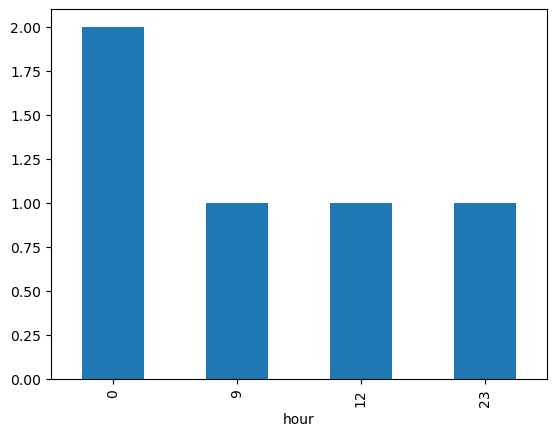

In [15]:
me=input()
df['hour'] = df['date_time'].apply(lambda x: x.hour)
df[df['user']==me].groupby(['hour']).size().sort_index().plot(x="hour", kind='bar')

How many words do I type on average on weekday vs weekend?

In [16]:
df['weekday'] = df['date_time'].apply(lambda x: x.day_name())

In [17]:
df['is_weekend'] = df.weekday.isin(['Sunday', 'Saturday'])

In [18]:
msgs_per_user = df['user'].value_counts(sort=True)
msgs_per_user


Harsha B11          4905
Eswar B11           4765
RISHIK B31          3107
+91 93926 47949     2213
Harish Bokka        1837
                    ... 
+91 73860 59767        2
+91 93983 28616        1
+91 95507 58987        1
+91 93900 84363        1
+91 6303 651 428       1
Name: user, Length: 73, dtype: int64

In [19]:
top5_users = msgs_per_user.index.tolist()[:5]
top5_users

['Harsha B11', 'Eswar B11', 'RISHIK B31', '+91 93926 47949', 'Harish Bokka']

In [20]:
df_top5 = df.copy()
df_top5 = df_top5[df_top5.user.isin(top5_users)]
df_top5.head()

,date_time,user,msg,emojis,hour,weekday,is_weekend
34,2021-01-17 19:20:00,RISHIK B31,Chusa,[],19,Sunday,True
56,2021-01-18 11:10:00,Harish Bokka,haa,[],11,Monday,False
69,2021-01-18 11:59:00,Eswar B11,Inka walk out chedama,[],11,Monday,False
71,2021-01-18 12:01:00,Eswar B11,"Kill kill kill ani mana moodu , intrest ani ki...",[🤦🏼],12,Monday,False
113,2021-01-20 23:47:00,Eswar B11,😉,[😉],23,Wednesday,False


<Axes: xlabel='user', ylabel='count'>

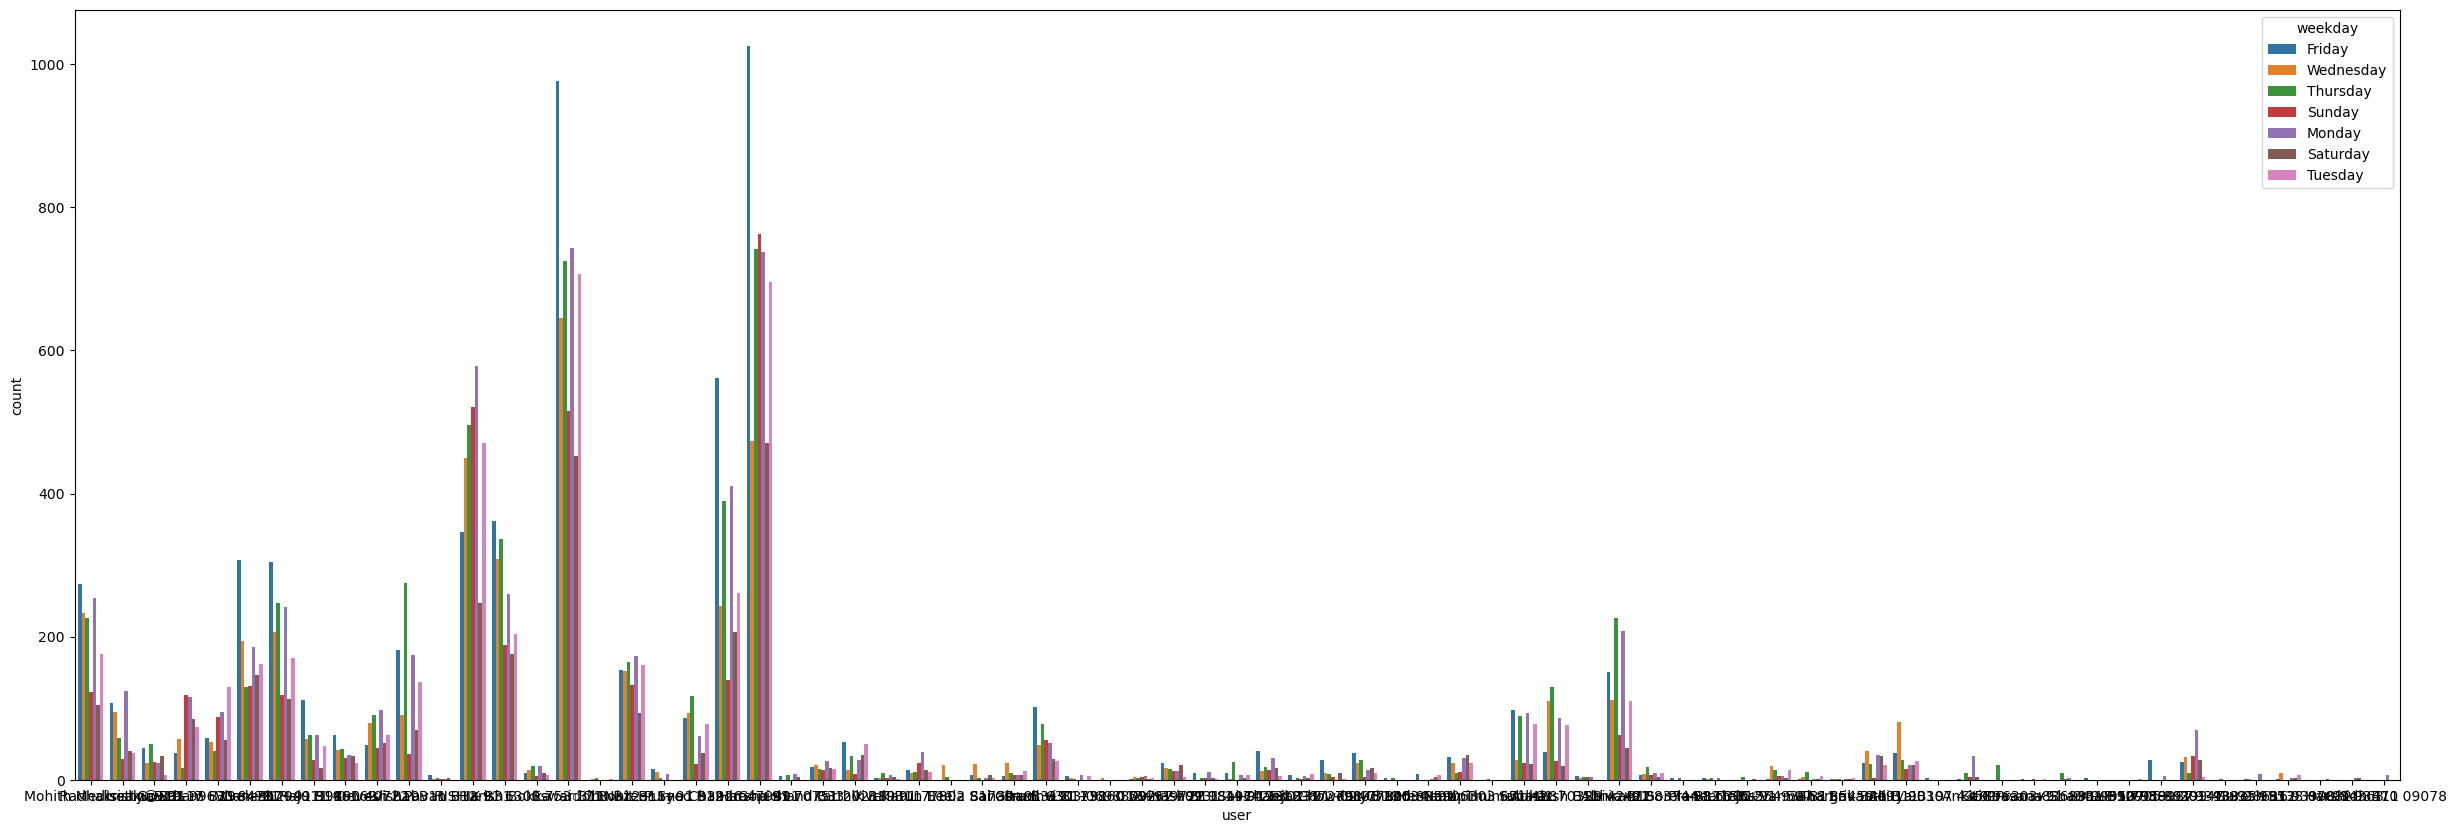

In [21]:
plt.figure(figsize=(30,10))
sns.countplot(x="user", hue="weekday", data=df)

In [22]:
df_top5['is_weekend'] = df_top5.weekday.isin(['Sunday', 'Saturday'])


<Axes: xlabel='user', ylabel='count'>

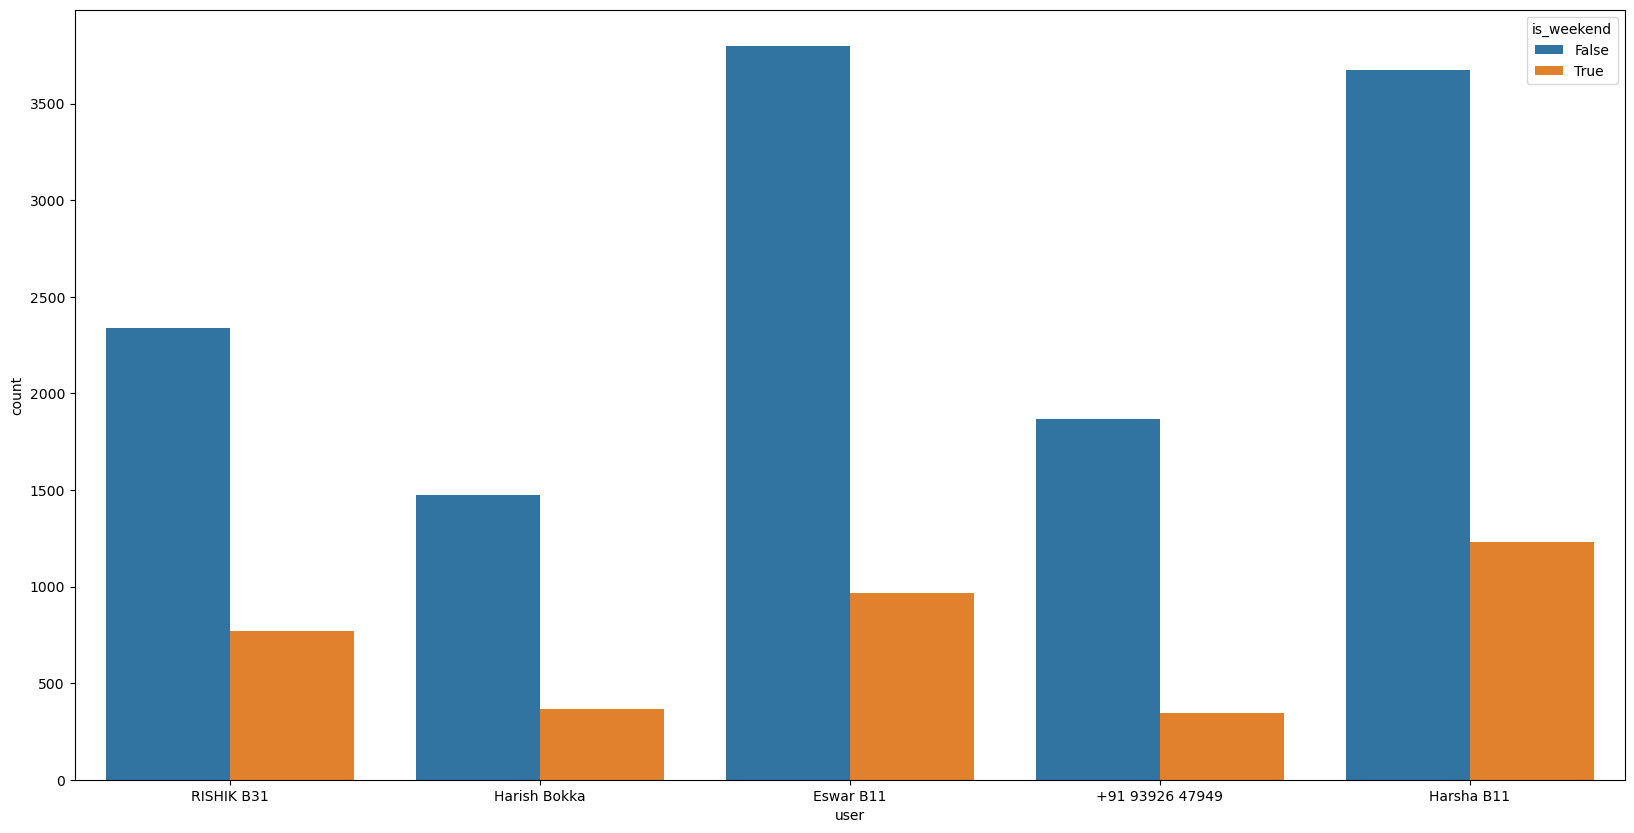

In [23]:
plt.figure(figsize=(20,10))
sns.countplot(x="user", hue="is_weekend", data=df_top5)


In [24]:
def word_count(val):
    return len(val.split())

In [25]:
def word_count(val):
    return len(val.split())

In [26]:
df_top5['no_of_words'] = df_top5['msg'].apply(word_count)


Q. At what time of day do I use WhatsApp most?


In [27]:
x = df.groupby(['hour', 'weekday'])['msg'].size().reset_index()
x2 = x.pivot("hour", 'weekday', 'msg')
x2.head()

C:\Users\gmass\AppData\Local\Temp\ipykernel_20064\1368439187.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  x2 = x.pivot("hour", 'weekday', 'msg')


weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hour,,,,,,,
0,11.0,27.0,18.0,16.0,22.0,8.0,7.0
1,NaN,NaN,5.0,5.0,8.0,1.0,1.0
3,1.0,3.0,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN
5,3.0,1.0,NaN,NaN,NaN,NaN,3.0


<Axes: xlabel='weekday', ylabel='hour'>

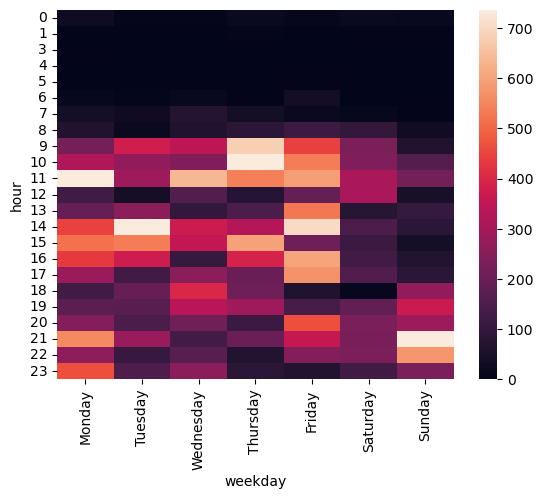

In [28]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
sns.heatmap(x2[days].fillna(0), robust=True)

Let's know whom did I respond the most in the group?

In [29]:
my_msgs_index = np.array(df[df['user']==me].index)
print(my_msgs_index, my_msgs_index.shape)

[ 112  116  118  122 6002] (5,)


In [30]:
prev_msgs_index = my_msgs_index - 1
print(prev_msgs_index, prev_msgs_index.shape)

[ 111  115  117  121 6001] (5,)


In [31]:
df_replies = df.iloc[prev_msgs_index].copy()
df_replies.shape

(5, 7)

<Axes: ylabel='user'>

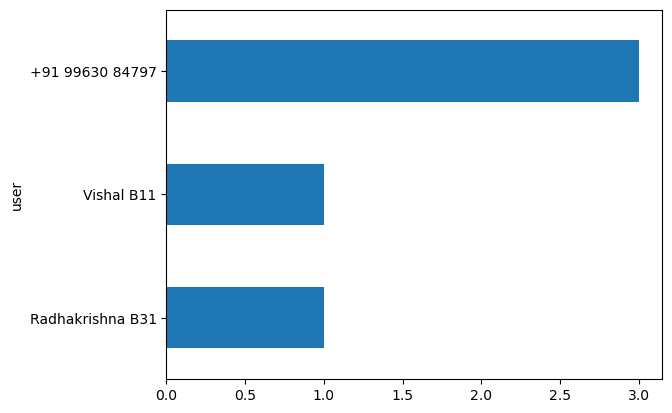

In [32]:
df_replies.groupby(["user"])["msg"].size().sort_values().plot(kind='barh')

In [33]:
comment_words = ' '
# stopwords = STOPWORDS.update([])
  
for val in df.msg.values: 
    val = str(val) 
    tokens = val.split() 
        
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 900, height = 800, 
                background_color ='black', 
#                 stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 

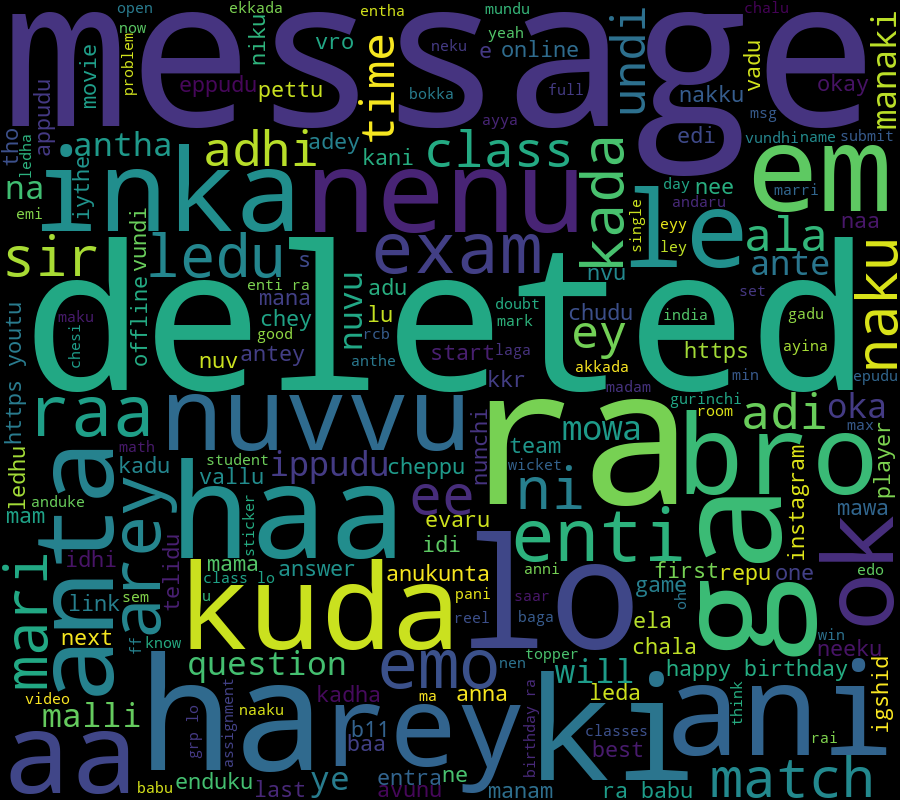

In [34]:
wordcloud.to_image()